In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
URL    = "https://es.wikipedia.org/wiki/Anexo:Milmillonarios_seg%C3%BAn_Forbes"

pagina = requests.get(URL)
soup   = BeautifulSoup(pagina.content, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Anexo:Milmillonarios según Forbes - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vec

In [3]:
# La tabla como tal está en wikitable sortable col1cen col2cen col3cen
tabla = soup.find("table", {"class":"wikitable sortable col1cen col2cen col3cen"})
tabla

<table class="wikitable sortable col1cen col2cen col3cen">
<tbody><tr>
<th>Año
</th>
<th>Número de milmillonarios
</th>
<th>Valor neto global del grupo<br/>mil millones
</th></tr>
<tr>
<td>2022
</td>
<td>2688
</td>
<td>$12,7
</td></tr>
<tr>
<td>2021
</td>
<td>2765
</td>
<td>$13,1
</td></tr>
<tr>
<td>2020
</td>
<td>2095
</td>
<td>$8,0
</td></tr>
<tr>
<td>2019
</td>
<td>2153
</td>
<td>$8,7
</td></tr>
<tr>
<td>2018
</td>
<td>2208
</td>
<td>$9,1
</td></tr>
<tr>
<td>2017
</td>
<td>2043
</td>
<td>$7,7
</td></tr>
<tr>
<td>2016
</td>
<td>1810
</td>
<td>$6,5
</td></tr>
<tr>
<td>2015
</td>
<td>1826
</td>
<td>$7,1
</td></tr>
<tr>
<td>2014
</td>
<td>1645
</td>
<td>$6.4
</td></tr>
<tr>
<td>2013
</td>
<td>1426
</td>
<td>$5,4
</td></tr>
<tr>
<td>2012
</td>
<td>1226
</td>
<td>$4,6
</td></tr>
<tr>
<td>2011
</td>
<td>1210
</td>
<td>$4,5
</td></tr>
<tr>
<td>2010
</td>
<td>1011
</td>
<td>$3,6
</td></tr>
<tr>
<td>2009
</td>
<td>793
</td>
<td>$2,4
</td></tr>
<tr>
<td>2008
</td>
<td>1125
</td>
<td>$4,4
</td>

In [4]:
# Parece que los nombres se encuentran dentro de etiquetas <tr>
#  y a su vez dentro de etiquetas <th> iteramos
nombres_columnas = []

for tr in tabla.find_all("tr"):
    for th in tr.find_all("th"):
        if not th: # Si th está vacío, no hacemos nada
            pass
        else:
            nombres_columnas.append(th.text.strip())

print("Nombres de columnas ", nombres_columnas)

Nombres de columnas  ['Año', 'Número de milmillonarios', 'Valor neto global del grupomil millones']


In [5]:
# Para los valores de la tabla, vemos que se encuentran dentro de <tr>
#  y a su vez dentro de <td>
valores = []

for tr in tabla.find_all("tr"):
    
    fila_actual = []
    for td in tr.find_all("td"):
        fila_actual.append(td.text.split()[0])
        
    if not fila_actual: # Si es lista vacía no hacemos nada
        pass
    else:
        valores.append(fila_actual)


valores

[['2022', '2688', '$12,7'],
 ['2021', '2765', '$13,1'],
 ['2020', '2095', '$8,0'],
 ['2019', '2153', '$8,7'],
 ['2018', '2208', '$9,1'],
 ['2017', '2043', '$7,7'],
 ['2016', '1810', '$6,5'],
 ['2015', '1826', '$7,1'],
 ['2014', '1645', '$6.4'],
 ['2013', '1426', '$5,4'],
 ['2012', '1226', '$4,6'],
 ['2011', '1210', '$4,5'],
 ['2010', '1011', '$3,6'],
 ['2009', '793', '$2,4'],
 ['2008', '1125', '$4,4'],
 ['2007', '946', '$3,5'],
 ['2006', '793', '$2,6'],
 ['2005', '691', '$2,2'],
 ['2004', '587', '$1,9'],
 ['2003', '476', '$1,4'],
 ['2002', '497', '$1,5'],
 ['2001', '538', '$1,8'],
 ['2000', '470', '$898']]

In [6]:
import pandas as pd

df_wiki = pd.DataFrame(valores, columns=nombres_columnas)
df_wiki

,Año,Número de milmillonarios,Valor neto global del grupomil millones
0,2022,2688,"$12,7"
1,2021,2765,"$13,1"
2,2020,2095,"$8,0"
3,2019,2153,"$8,7"
4,2018,2208,"$9,1"
5,2017,2043,"$7,7"
6,2016,1810,"$6,5"
7,2015,1826,"$7,1"
8,2014,1645,$6.4
9,2013,1426,"$5,4"


In [7]:
# Cambiamos los nombres de las columnas...
df_wiki.columns = ["Year", "N_multimillionaries", "Net_Worth"]
df_wiki.head()

,Year,N_multimillionaries,Net_Worth
0,2022,2688,"$12,7"
1,2021,2765,"$13,1"
2,2020,2095,"$8,0"
3,2019,2153,"$8,7"
4,2018,2208,"$9,1"


In [8]:
def convert_decimal(row):
    if "," in row:
        return float(row.replace('$', '').replace(',', '.'))*1000
    elif "." in row:
        return float(row.replace('$', ''))*1000
    else:
        return row.replace('$', '')

In [9]:
df_wiki["Net_Worth"] = df_wiki["Net_Worth"].apply(convert_decimal)

In [10]:
df_wiki

,Year,N_multimillionaries,Net_Worth
0,2022,2688,12700.0
1,2021,2765,13100.0
2,2020,2095,8000.0
3,2019,2153,8700.0
4,2018,2208,9100.0
5,2017,2043,7700.0
6,2016,1810,6500.0
7,2015,1826,7100.0
8,2014,1645,6400.0
9,2013,1426,5400.0


In [11]:
df_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 23 non-null     object
 1   N_multimillionaries  23 non-null     object
 2   Net_Worth            23 non-null     object
dtypes: object(3)
memory usage: 680.0+ bytes


In [12]:
for col in df_wiki.columns:
    df_wiki[col] = pd.to_numeric(df_wiki[col])

In [13]:
df_wiki.style.background_gradient(cmap="Blues")

,Year,N_multimillionaries,Net_Worth
0,2022,2688,12700.000000
1,2021,2765,13100.000000
2,2020,2095,8000.000000
3,2019,2153,8700.000000
4,2018,2208,9100.000000
5,2017,2043,7700.000000
6,2016,1810,6500.000000
7,2015,1826,7100.000000
8,2014,1645,6400.000000
9,2013,1426,5400.000000


In [14]:
import matplotlib.pyplot as plt

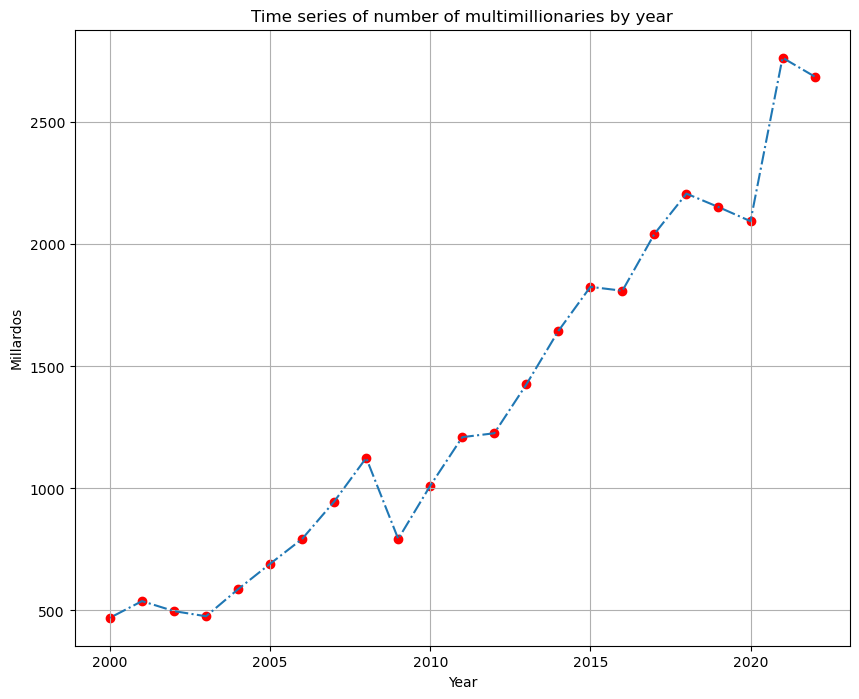

In [15]:
plt.figure(figsize=(10, 8))

plt.plot(df_wiki.Year, df_wiki.N_multimillionaries, linestyle='dashdot')
plt.scatter(df_wiki.Year, df_wiki.N_multimillionaries, color="red")

plt.title("Time series of number of multimillionaries by year")
plt.xlabel("Year")
plt.ylabel("Millardos")

plt.grid()
plt.show()